In [20]:
import logging
config = {
    "processor_name": "microsoft/trocr-large-handwritten",
    "model_name": "Daominhwysi/vietnamese-trocr-large-handwritten-v2",
    "tokenizer_name": "vinai/phobert-base-v2",
    "output_dir": "./output",
    "train_test_split_ratio": 0.1,
    "max_target_length": 256,
    "batch_size": 2,
    "learning_rate": 1e-5,
    "num_train_epochs": 30,
    "logging_steps": 4,
    "save_steps": 2000,
    "eval_steps": 2000,
    "gradient_accumulation_steps": 4,
    "early_stopping": True,
    "no_repeat_ngram_size": 3,
    "length_penalty": 2.0,
    "num_beams": 4,
}
logging.basicConfig(level=logging.INFO)

# Data Preparation



In [2]:
import json
import pandas as pd

In [3]:
import requests

# URL của file bạn muốn tải từ Hugging Face
url = 'https://huggingface.co/datasets/Daominhwysi/VNonDB/resolve/main/vn_handwritten_images.zip?download=true'

# Tên file sẽ được lưu sau khi tải về
file_name = 'vn_handwritten_images.zip'

# Tải file từ URL
response = requests.get(url, stream=True)

# Kiểm tra nếu tải thành công
if response.status_code == 200:
    with open(file_name, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    print(f'Tải xuống thành công: {file_name}')
else:
    print(f'Không thể tải xuống file. Mã lỗi: {response.status_code}')


Tải xuống thành công: vn_handwritten_images.zip


In [4]:
import zipfile
import os

# Đường dẫn đến file zip sau khi tải lên
zip_file_path = '/content/vn_handwritten_images.zip'
# Thư mục đích để giải nén
extract_to_dir = '/content/datasets'

# Tạo thư mục đích nếu nó chưa tồn tại
if not os.path.exists(extract_to_dir):
    os.makedirs(extract_to_dir)

# Giải nén file zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

print(f'Giải nén thành công vào thư mục: {extract_to_dir}')


Giải nén thành công vào thư mục: /content/datasets


In [5]:
import json
import pandas as pd
import logging

try:
    # Đọc dữ liệu từ file labels.json
    with open('/content/datasets/cinamonai/labels.json', 'r') as file:
        labels = json.load(file)
    # Chuyển dữ liệu thành DataFrame
    df_1 = pd.DataFrame(list(labels.items()), columns=['file_name', 'label'])
except Exception as e:
    logging.error(f"Lỗi khi tải nhãn: {e}")

# Cộng thêm đường dẫn và đuôi .jpeg vào mỗi file_name
df_1['file_name'] = df_1['file_name'].apply(lambda x: f'/content/datasets/cinamonai/data/{x}.jpeg')

# Hiển thị DataFrame
df_1.head()


,file_name,label
0,/content/datasets/cinamonai/data/0000_samples....,"Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyệ..."
1,/content/datasets/cinamonai/data/0001_samples....,"Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạn..."
2,/content/datasets/cinamonai/data/0002_samples....,"Số 246E/2, Khu phố 1B, Phường An Phú, Tx Thuận..."
3,/content/datasets/cinamonai/data/0003_samples....,"42 Đặng Thị Nhu, Phường Nguyễn Thái Bình, Quận..."
4,/content/datasets/cinamonai/data/0004_samples....,"200 Phan Bội Châu, Phường Trường An, Thành phố..."


In [6]:
import json
import pandas as pd
import logging

try:
    # Đọc dữ liệu từ file labels.json
    with open('/content/datasets/vnondb/labels.json', 'r') as file:
        labels = json.load(file)
    # Chuyển dữ liệu thành DataFrame
    df_2 = pd.DataFrame(list(labels.items()), columns=['file_name', 'label'])
except Exception as e:
    logging.error(f"Lỗi khi tải nhãn: {e}")

# Cộng thêm đường dẫn và đuôi .jpeg vào mỗi file_name
df_2['file_name'] = df_2['file_name'].apply(lambda x: f'/content/datasets/vnondb/outputs_image/{x}.jpeg')

# Hiển thị DataFrame
df_2.head()


,file_name,label
0,/content/datasets/vnondb/outputs_image/writer_...,Nước ta giáp với biển Đông ở hai phía Đông và ...
1,/content/datasets/vnondb/outputs_image/writer_...,"Bờ biển dài 3.260 km, từ Quảng Ninh đến Kiên G..."
2,/content/datasets/vnondb/outputs_image/writer_...,có 1 km bờ biển (trung bình của thế giới là 60...
3,/content/datasets/vnondb/outputs_image/writer_...,"Biển có vùng nội thủy, lãnh hải, vùng đặc quyề..."
4,/content/datasets/vnondb/outputs_image/writer_...,tích trên 1 triệu km2 (gấp 3 diện tích đất liề...


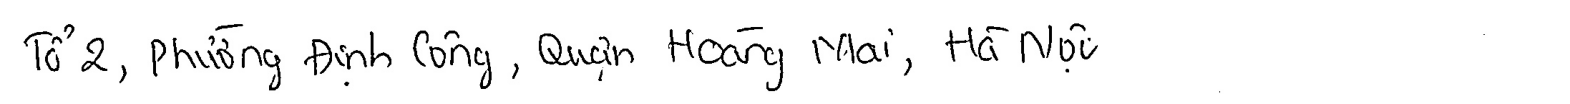

Labeled as: Tổ 2, Phường Định Công, Quận Hoàng Mai, Hà Nội


In [7]:
import pandas as pd
import random
from PIL import Image
import matplotlib.pyplot as plt

# Giả sử bạn đã có DataFrame df_1 từ đoạn mã trước
# Chọn một hàng ngẫu nhiên từ DataFrame
random_row = df_1.sample(n=1).iloc[0]

# Lấy đường dẫn file_name
file_path = random_row['file_name']

# Mở ảnh
image = Image.open(file_path).convert('RGB')
# Hiển thị ảnh
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.axis('off')  # Ẩn trục
plt.show()

# Hiển thị nhãn
print(f"Labeled as: {random_row['label']}")


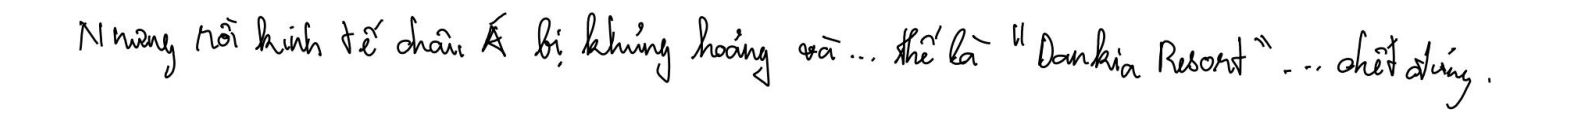

Labeled as: Nhưng rồi kinh tế châu Á bị khủng hoảng và... thế là " Dankia Resort "... chết đứng


In [8]:
import pandas as pd
import random
from PIL import Image
import matplotlib.pyplot as plt

# Giả sử bạn đã có DataFrame df_1 từ đoạn mã trước
# Chọn một hàng ngẫu nhiên từ DataFrame
random_row = df_2.sample(n=1).iloc[0]

# Lấy đường dẫn file_name
file_path = random_row['file_name']

# Mở ảnh
image = Image.open(file_path).convert('RGB')
# Hiển thị ảnh
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.axis('off')  # Ẩn trục
plt.show()

# Hiển thị nhãn
print(f"Labeled as: {random_row['label']}")


# Data loader

In [9]:
#conbine 2 df
df = pd.concat([df_1, df_2], ignore_index=True)

In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=config['train_test_split_ratio'])
# we reset the indices to start from zero
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [11]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class VnHandwrittenImagesDataset(Dataset):
    def __init__(self, df, processor, max_target_length=config['max_target_length']):
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # get file name + text
        file_name = self.df['file_name'][idx]
        # Check if 'text' is the correct column name, or if it should be something else, e.g., 'transcription'
        text = self.df['label'][idx] # Replace 'transcription' with the actual column name if it's different
        # prepare image (i.e. resize + normalize)
        image = Image.open(file_name).convert("RGB")
        pixel_values = self.processor(image, return_tensors="pt").pixel_values
        # add labels (input_ids) by encoding the text
        labels = self.processor.tokenizer(text,
                                          padding="max_length",
                                          max_length=self.max_target_length).input_ids
        # important: make sure that PAD tokens are ignored by the loss function
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

# Model

In [21]:
from transformers import TrOCRProcessor
from torch.utils.data import DataLoader
from transformers import VisionEncoderDecoderModel, AutoTokenizer
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
processor = TrOCRProcessor.from_pretrained(config["processor_name"])
model = VisionEncoderDecoderModel.from_pretrained(config["model_name"])
tokenizer = AutoTokenizer.from_pretrained(config["tokenizer_name"])

model.to(device)
train_dataset = VnHandwrittenImagesDataset(df=train_df, processor=processor, max_target_length=config["max_target_length"])
eval_dataset = VnHandwrittenImagesDataset(df=test_df, processor=processor, max_target_length=config["max_target_length"])


train_dataloader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
eval_dataloader = DataLoader(eval_dataset, batch_size=config['batch_size'])

In [22]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset))

Number of training examples: 6695
Number of validation examples: 744


In [23]:
model.config.decoder.vocab_size = len(tokenizer)
model.decoder.resize_token_embeddings(len(tokenizer))

model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.eos_token_id = tokenizer.sep_token_id
#Dropout
model.config.dropout = 0.
model.config.max_length = config["max_target_length"]
model.config.early_stopping = config["early_stopping"]
model.config.no_repeat_ngram_size = config["no_repeat_ngram_size"]
model.config.length_penalty = config["length_penalty"]
model.config.num_beams = config["num_beams"]
len(tokenizer)

64001

In [24]:
%pip install evaluate jiwer

In [25]:
import evaluate
cer_metric = evaluate.load("cer")

def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer}

# Train Model

In [26]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy="steps",
    per_device_train_batch_size=config["batch_size"],
    per_device_eval_batch_size=config["batch_size"],
    fp16=True,
    output_dir=config["output_dir"],
    logging_steps=config["logging_steps"],
    save_steps=config["save_steps"],
    eval_steps=config["eval_steps"],
    gradient_accumulation_steps=config["gradient_accumulation_steps"],
    learning_rate=config["learning_rate"],
    num_train_epochs=config["num_train_epochs"],
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [28]:
from transformers import default_data_collator
# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=processor.image_processor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
)
trainer.train()

OutOfMemoryError: CUDA out of memory. Tried to allocate 16.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 5.06 MiB is free. Process 15026 has 14.74 GiB memory in use. Of the allocated memory 14.23 GiB is allocated by PyTorch, and 380.01 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

# Interface

In [ ]:
model = VisionEncoderDecoderModel.from_pretrained('/content/output/checkpoint-400')
processor = TrOCRProcessor.from_pretrained(config["processor_name"])

# Move model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-23): 24 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=False)
              (key): Linear(in_features=1024, out_features=1024, bias=False)
              (value): Linear(in_features=1024, out_features=1024, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Line

In [ ]:
def predict_text(image):
    # Process image and move it to the correct device
    pixel_values = processor(image, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    # Generate prediction
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text

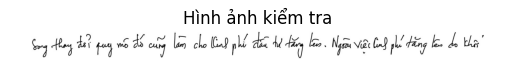

Nhãn thực tế: Song thay qui mô đó cũng làm cho kinh phí đầu tư tăng lên. Ngoài việc kinh phí tăng lên do khối
Văn bản dự đoán: Song thay đổi quy mó đó cứng làm cho lình phí đâu tầng lên. Ngồu Việc Cánh phú tăng Lên do khối


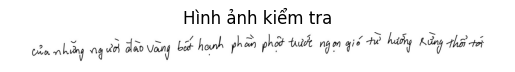

Nhãn thực tế: của những người đào vàng bất hạnh phần phật trước ngọn gió từ hướng rừng thổi tới
Văn bản dự đoán: của những người đao vàng bát hạnh phầm phột tuốt ngọi gió từ hương rựng thớn tôi


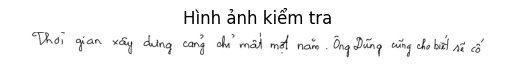

Nhãn thực tế: Thời gian xây dựng cảng chỉ mất một năm. Ông Dũng cũng cho biết sẽ cố
Văn bản dự đoán: Thời gian xây dưng cảng chỉ mất một năm. Ông Đúng cũng cho biết số có


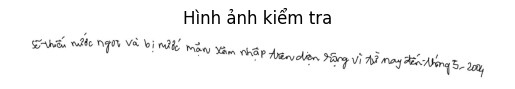

Nhãn thực tế: sẽ thiếu nước ngọt và bị nước mặn xâm nhập trên diện rộng vì từ nay đến tháng 5 - 2004
Văn bản dự đoán: đi thếu nước ngưi và bị nữtc mận xêm nhộp đạn diện rặng vì tở may đán, Năng 5 - 2004


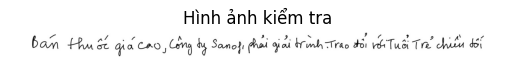

Nhãn thực tế: Bán thuốc giá cao, Công ty Sanofi phải giải trình. Trao đổi với Tuổi Trẻ chiều tối
Văn bản dự đoán: Bán thu ốc giá cao, công ty sanoy, phải giời trình. Trao đổi rới Tuội Tre chiếu tối


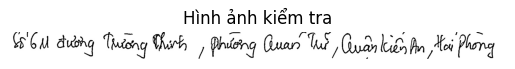

Nhãn thực tế: Số 611 đường Trường Chinh, Phường Quán Trữ, Quận Kiến An, Hải Phòng
Văn bản dự đoán: Số 611 đường Trương Thình, Phưông Quán Trủ, Quận Kiến An, Hai Phòng


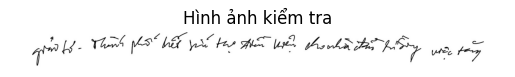

Nhãn thực tế: giải tỏa. Thành phố hết sức tạo điều kiện cho nhà đầu tư song việc tăng
Văn bản dự đoán: gịn tư. Thành phố hết sứn tạp đầm kiện cho nhỏa đãn rưâng vực tững


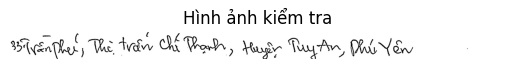

Nhãn thực tế: 33 Trần Phú, Thị trấn Chí Thạnh, Huyện Tuy An, Phú Yên
Văn bản dự đoán: 33 Trễn Phế, Thị Trấn Chồ Phệnh, Huyộn Tuy An, Phú Yên


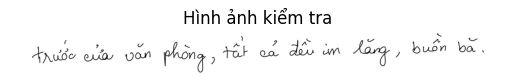

Nhãn thực tế: trước cửa văn phòng, tất cả đều lặng im, buồn bã.
Văn bản dự đoán: trước cứa văn phòng, tất cả đầu im lếng, buồn bá.


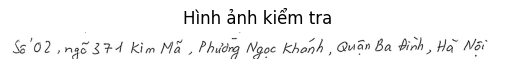

Nhãn thực tế: Số 02, ngõ 371 Kim Mã, Phường Ngọc Khánh, Quận Ba Đình, Hà Nội
Văn bản dự đoán: Số 02, ngổ 37 1 Kim Mà, Phường Ngọc Khánh, Quận Ba Đình, Hà Nội
Thời gian trung bình: 5.0341 giây


In [ ]:
import time
import numpy as np
def measure_time():
    total_time = 0
    num_runs = 10

    for _ in range(num_runs):
        start_time = time.time()
        random_index = np.random.randint(0, len(test_df))
        test_image_name = test_df.iloc[random_index]['file_name']
        test_image_label = test_df.iloc[random_index]['label']

        # Đọc và hiển thị hình ảnh
        image = Image.open(test_image_name).convert("RGB")
        plt.imshow(image)
        plt.title("Hình ảnh kiểm tra")
        plt.axis('off')
        plt.show()

        # Dự đoán văn bản từ hình ảnh
        predicted_text = predict_text(image)

        # In kết quả
        print(f"Nhãn thực tế: {test_image_label}")
        print(f"Văn bản dự đoán: {predicted_text}")

        end_time = time.time()
        total_time += end_time - start_time

    average_time = total_time / num_runs
    print(f"Thời gian trung bình: {average_time:.4f} giây")

# Gọi hàm để đo thời gian
measure_time()

# **Upload Model**

In [ ]:
!pip install transformers huggingface_hub


In [ ]:
from huggingface_hub import login
login(token="")


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from huggingface_hub import HfApi, HfFolder

api = HfApi()
repo_id = "Daominhwysi/vietnamese-trocr-large-handwritten-v2"

# Upload folder
api.upload_folder(
    folder_path="/content/output/checkpoint-400",
    repo_id=repo_id,
    repo_type="model"
)

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/2.29G [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Daominhwysi/vietnamese-trocr-large-handwritten-v2/commit/6c0c0129ffaeaa2b21bf1f9e4c638ebb770bc302', commit_message='Upload folder using huggingface_hub', commit_description='', oid='6c0c0129ffaeaa2b21bf1f9e4c638ebb770bc302', pr_url=None, pr_revision=None, pr_num=None)